In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv(r"C:\Users\prati\Downloads\train.csv")
df_test = pd.read_csv(r"C:\Users\prati\Downloads\test.csv")

In [4]:
X_train_text = df_train['text'].astype(str)
y_train = df_train['label'].astype(int)

X_test_text = df_test['text'].astype(str)
y_test = df_test['label'].astype(int)

In [5]:
num_words = 1000
maxlen = 200

In [6]:
tokenizer = Tokenizer(num_words = num_words,oov_token = "<OOV>")
tokenizer.fit_on_texts(X_train_text )

In [7]:
X_train = tokenizer.texts_to_sequences(X_train_text)
X_test = tokenizer.texts_to_sequences(X_test_text)

In [8]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train,maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test,maxlen)

In [16]:
model = models.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [18]:
history = model.fit(
    X_train,y_train,
    epochs = 5,
    validation_split = 0.2,
    batch_size = 128,
    verbose = 1
)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5758 - val_accuracy: 0.7905 - val_loss: 0.4398
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8312 - loss: 0.3812 - val_accuracy: 0.8541 - val_loss: 0.3451
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8488 - loss: 0.3433 - val_accuracy: 0.8558 - val_loss: 0.3350
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8579 - loss: 0.3284 - val_accuracy: 0.8496 - val_loss: 0.3434
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8590 - loss: 0.3262 - val_accuracy: 0.8575 - val_loss: 0.3246


In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

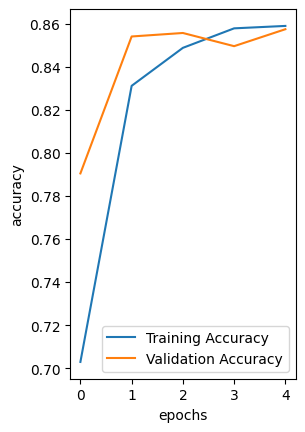

In [20]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()